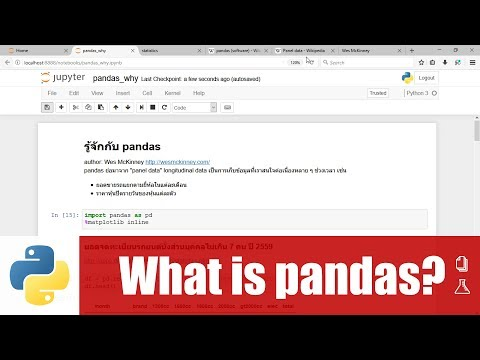

In [1]:
#วิดีโอสอน pandas
from IPython.display import IFrame, YouTubeVideo, SVG, HTML
YouTubeVideo('W661Zy939Q0', 400,300)  # https://www.youtube.com/watch?v=W661Zy939Q0&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=20

# รู้จักกับ pandas
author: Wes McKinney http://wesmckinney.com/  
pandas ย่อมาจาก "panel data" longitudinal data เป็นการเก็บข้อมูลที่เราสนใจต่อเนื่องหลาย ๆ ช่วงเวลา เช่น 
* ยอดขายรถแยกตามยี่ห้อในแต่ละเดือน
* ราคาหุ้นปิดรายวันของหุ้นแต่ละตัว

In [2]:
import pandas as pd
%matplotlib inline

### ยอดจดทะเบียนรถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน ปี 2559
http://apps.dlt.go.th/statistics_web/statistics.html

In [3]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/panel_data.csv')
df.head()

,month,brand,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
0,1,ALFA ROMEO,0,0,0,0,1,0,1
1,1,AUDI,0,2,0,14,0,0,16
2,1,BENTLEY,0,0,0,0,2,0,2
3,1,BMW,1,45,0,586,64,0,696
4,1,CADILLAC,0,0,0,0,1,0,1


In [4]:
df[df.brand.str.contains('AUDI|BMW|BENZ')]

,month,brand,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
1,1,AUDI,0,2,0,14,0,0,16
3,1,BMW,1,45,0,586,64,0,696
20,1,MERCEDES BENZ,0,161,46,372,605,0,1184
38,2,AUDI,0,0,0,10,0,0,10
39,2,BMW,0,60,0,689,52,0,801
55,2,MERCEDES BENZ,0,193,42,475,672,0,1382
77,3,AUDI,0,0,0,15,1,0,16
79,3,BMW,0,55,0,658,55,0,768
92,3,MERCEDES BENZ,0,174,41,554,650,0,1419
110,4,AUDI,0,0,0,7,0,0,7


In [5]:
# df.sample(n=10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 9 columns):
month       430 non-null int64
brand       430 non-null object
1300cc      430 non-null int64
1600cc      430 non-null int64
1800cc      430 non-null int64
2000cc      430 non-null int64
gt2000cc    430 non-null int64
elec        430 non-null int64
total       430 non-null int64
dtypes: int64(8), object(1)
memory usage: 30.4+ KB


In [7]:
t = df.sum(numeric_only=True) # tip: set numeric_only=True
t

month         2761
1300cc      106020
1600cc      133028
1800cc       42628
2000cc       85363
gt2000cc    168878
elec             2
total       535919
dtype: int64

In [8]:
t = df.drop(['month'], axis=1).sum(numeric_only=True) # tip: set numeric_only=True
t

1300cc      106020
1600cc      133028
1800cc       42628
2000cc       85363
gt2000cc    168878
elec             2
total       535919
dtype: int64

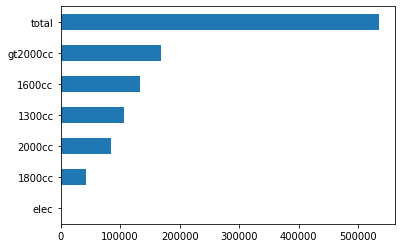

In [9]:
t.sort_values().plot(kind='barh');

In [10]:
df.drop(['month'], axis=1).groupby('brand').sum().nlargest(5, 'total')

,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
brand,,,,,,,
TOYOTA,37713,36105,7715,4359,72058,0,157950
HONDA,1890,69590,32547,9524,2575,0,116126
ISUZU,0,0,0,35943,12144,0,48087
MITSUBISHI,15342,3,64,173,32286,0,47868
MAZDA,14962,8423,0,11384,5137,0,39906


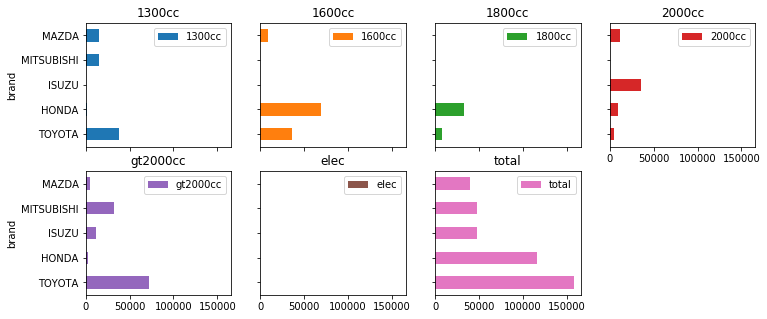

In [11]:
df.drop(['month'], axis=1).groupby('brand').sum().nlargest(5, 'total') \
    .plot(kind='barh', subplots=True, layout=(2, 4), figsize=(12, 5), sharey=True);

In [12]:
df.groupby('brand').sum().nsmallest(10, 'total')

,month,1300cc,1600cc,1800cc,2000cc,gt2000cc,elec,total
brand,,,,,,,,
CHRYSLER,10,0,0,0,1,0,0,1
HUMMER,10,0,0,0,0,1,0,1
LOTUS,12,0,0,0,0,1,0,1
NAZA,21,1,0,0,0,1,0,2
CHERY,12,0,0,0,3,0,0,3
DAIHATSU,7,4,0,0,0,0,0,4
MITSUOKA,6,0,0,0,3,1,0,4
PERODUA,8,0,4,0,0,0,0,4
SKODA,30,0,1,2,1,0,0,4


In [13]:
# df.to_excel('data/panel_data.xlsx', index=False)

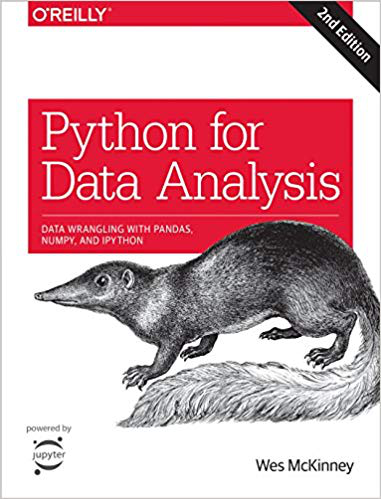

In [14]:
import requests
from PIL import Image # pillow package (Python Image Library)
import io

r = requests.get('https://images-na.ssl-images-amazon.com/images/I/51cUNf8zukL._SX379_BO1,204,203,200_.jpg')
img = Image.open(io.BytesIO(r.content))
img